<a href="https://colab.research.google.com/github/hetanshipatel/cryptocurrency-price-prediction/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Cryptocurrency Price Prediction Models: LSTM, and Bidirectional LSTM, Random Forest Regressor**

**Importing Essential Modules for Cryptocurrency Price Prediction and Analysis**



In [ ]:
# Import required modules
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive


drive.mount('/content/drive')

# Display plots directly in the notebook
%matplotlib inline

# Set the visual style and plot size
sns.set(style='white', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

# Define a fixed seed for random operations
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Cryptocurrency Price Data from CSV Files**

In [ ]:
# Set the file paths for Bitcoin (BTC) and Ethereum (ETH) datasets
path_bt = '/content/drive/MyDrive/hp/BTC-GBP.csv'
path_eth = '/content/drive/MyDrive/hp/ETH-GBP.csv'

# Read the CSV files into DataFrames, while parsing the 'Date' column as datetime
# This helps in proper handling of date information in the dataset
df_bt = pd.read_csv(path_bt, parse_dates=['Date'])
df_eth = pd.read_csv(path_eth, parse_dates=['Date'])

**Preprocessing Cryptocurrency Data for Analysis**

In [ ]:
df_bt = df_bt.sort_values('Date')
df_eth = df_eth.sort_values('Date')

In [ ]:
df_bt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-01,5645.142090,5723.436523,5556.060547,5647.334473,5647.334473,3685382825
1,2018-06-02,5643.792480,5762.939941,5614.242676,5723.715820,5723.715820,3698741830
2,2018-06-03,5715.208984,5807.166504,5700.943359,5782.092773,5782.092773,3633732870
3,2018-06-04,5783.799805,5799.850098,5610.298828,5644.036621,5644.036621,3750315397
4,2018-06-05,5633.844238,5706.032227,5557.893066,5695.135742,5695.135742,3701685897


In [ ]:
df_bt.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1821,2023-05-27,21494.468750,21809.986328,21360.781250,21642.064453,21642.064453,10296144629
1822,2023-05-28,21642.787109,21779.431641,21562.566406,21762.802734,21762.802734,6392366532
1823,2023-05-29,21765.074219,22833.591797,21709.666016,22749.542969,22749.542969,11781723230
1824,2023-05-30,22741.398438,23033.818359,22297.275391,22471.197266,22471.197266,12295235877
1825,2023-05-31,22470.582031,22571.712891,22237.712891,22317.843750,22317.843750,10675469072


In [ ]:
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-01,435.517426,443.126984,425.440277,434.359009,434.359009,1457158940
1,2018-06-02,434.648071,447.114746,432.321411,443.169067,443.169067,1408109942
2,2018-06-03,442.757965,467.659882,442.757965,463.098389,463.098389,1372491025
3,2018-06-04,463.928253,466.359222,438.248505,445.384552,445.384552,1429645498
4,2018-06-05,445.700775,456.012238,436.565979,454.568024,454.568024,1375910140


In [ ]:
df_eth.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1821,2023-05-27,1466.073853,1488.029907,1458.789673,1481.200317,1481.200317,4415531070
1822,2023-05-28,1481.107910,1487.270996,1472.130371,1483.167358,1483.167358,2605489946
1823,2023-05-29,1483.151489,1551.569092,1478.590088,1547.851929,1547.851929,5151322712
1824,2023-05-30,1546.542480,1560.663574,1520.079834,1533.190674,1533.190674,4765956743
1825,2023-05-31,1533.202881,1542.547729,1524.176636,1531.524048,1531.524048,4320947993


In [ ]:
df_bt.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,2020-11-29 12:00:00,16500.699615,16880.614738,16086.195337,16507.527042,16507.527042,2.140319e+10
min,2018-06-01 00:00:00,2570.718750,2601.780029,2534.996094,2571.105469,2571.105469,2.209545e+09
25%,2019-08-31 06:00:00,6213.572632,6295.655518,6047.842773,6224.399780,6224.399780,1.258521e+10
50%,2020-11-29 12:00:00,13637.283203,13766.098144,13405.605468,13647.676270,13647.676270,1.972482e+10
75%,2022-02-28 18:00:00,24722.550781,25388.804687,23837.081543,24625.141114,24625.141114,2.784905e+10
max,2023-05-31 00:00:00,49800.839844,50843.445313,48966.792969,49813.441406,49813.441406,2.519364e+11
std,NaN,12191.156570,12501.047265,11832.123150,12185.739015,12185.739015,1.436934e+10


In [ ]:
df_eth.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,2020-11-29 12:00:00,937.256124,964.471839,906.964746,937.654321,937.654321,1.046592e+10
min,2018-06-01 00:00:00,66.947151,67.791580,65.358711,66.969872,66.969872,8.455009e+08
25%,2019-08-31 06:00:00,165.597092,170.343525,160.701553,165.619926,165.619926,5.159247e+09
50%,2020-11-29 12:00:00,439.033707,450.496353,426.158554,441.278366,441.278366,8.989550e+09
75%,2022-02-28 18:00:00,1471.862609,1508.160584,1438.700623,1471.198547,1471.198547,1.423074e+10
max,2023-05-31 00:00:00,3546.210693,3635.696045,3480.266357,3547.697266,3547.697266,5.988639e+10
std,NaN,895.232255,921.177504,865.555711,894.881623,894.881623,7.673428e+09


In [ ]:
# Print the shape of the Bitcoin DataFrame
print("Bitcoin DataFrame Shape:", df_bt.shape)

# Print the shape of the Ethereum DataFrame
print("Ethereum DataFrame Shape:", df_eth.shape)

Bitcoin DataFrame Shape: (1826, 7)
Ethereum DataFrame Shape: (1826, 7)


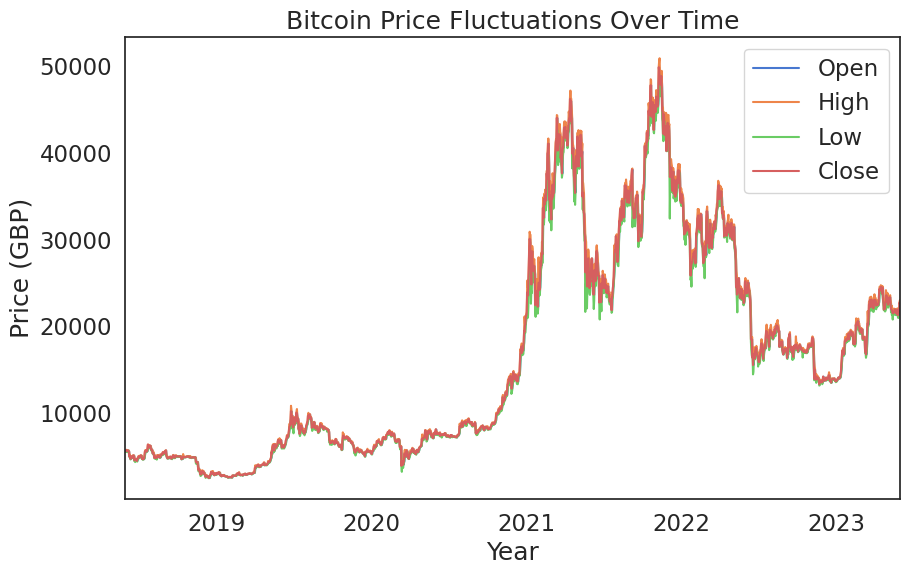

In [ ]:
# Create a plot using DataFrame plotting function
ax_bt = df_bt.plot(x='Date', y=['Open', 'High', 'Low', 'Close'], figsize=(10, 6))

# Set the labels for the axes
ax_bt.set_xlabel("Year")
ax_bt.set_ylabel("Price (GBP)")

# Set the title for the plot
ax_bt.set_title("Bitcoin Price Fluctuations Over Time")

# Display the legend with labels for each line
ax_bt.legend()

# Show the plot
plt.show()

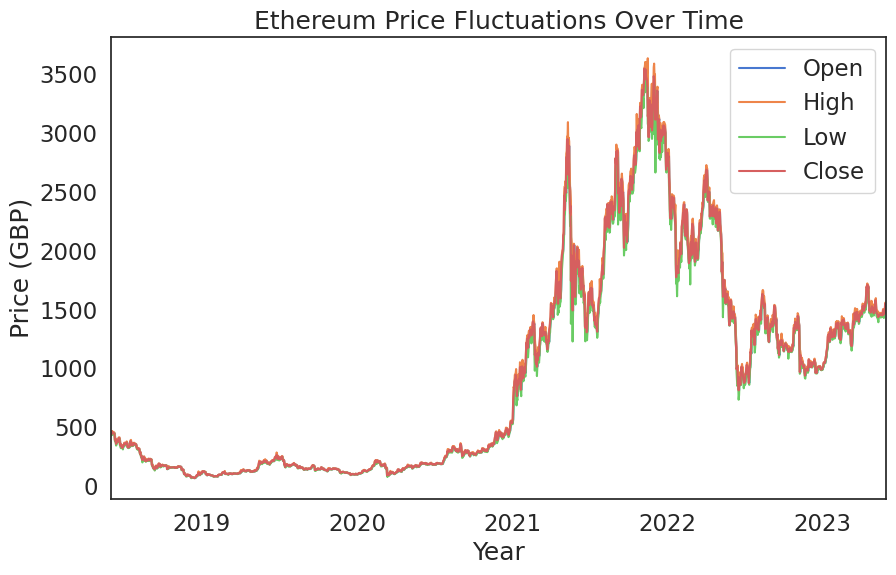

In [ ]:
# Create a plot using DataFrame plotting function
ax_eth = df_eth.plot(x='Date', y=['Open', 'High', 'Low', 'Close'], figsize=(10, 6))

# Set the labels for the axes
ax_eth.set_xlabel("Year")
ax_eth.set_ylabel("Price (GBP)")

# Set the title for the plot
ax_eth.set_title("Ethereum Price Fluctuations Over Time")

# Display the legend with labels for each line
ax_eth.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation ratio
correlation_ratio = df_bt[['Open', 'High', 'Low', 'Close']].corrwith(df_eth[['Open', 'High', 'Low', 'Close']])

# Print the correlation ratio values
print("Correlation Ratio Between Ethereum and Bitcoin Prices:")
print("Open:", correlation_ratio['Open'])
print("High:", correlation_ratio['High'])
print("Low:", correlation_ratio['Low'])
print("Close:", correlation_ratio['Close'])

Correlation Ratio Between Ethereum and Bitcoin Prices:
Open: 0.926427601234301
High: 0.9259411432400284
Low: 0.9273556856723104
Close: 0.9263919295015954


In [ ]:
# Initialize a MinMaxScaler
scaler_bt = MinMaxScaler()

# Extract the 'Close' prices from the Bitcoin DataFrame and reshape
close_price_bt = df_bt.Close.values.reshape(-1, 1)

# Scale the 'Close' prices using the scaler
scaled_close_bt = scaler_bt.fit_transform(close_price_bt)

# Obtain the shape of the scaled_close array
print("Shape of scaled_close_bt:", scaled_close_bt.shape)

# Check if there are any NaN values in the scaled_close array
print("Are there any NaN values in scaled_close_bt?", np.isnan(scaled_close_bt).any())

# Remove NaN values from the scaled_close array
cleaned_scaled_close_bt = scaled_close_bt[~np.isnan(scaled_close_bt)]

# Reshape the cleaned scaled_close array
reshaped_scaled_close_bt = cleaned_scaled_close_bt.reshape(-1, 1)

# Check if there are any NaN values in the reshaped_scaled_close array
print("Are there any NaN values in reshaped_scaled_close_bt?", np.isnan(reshaped_scaled_close_bt).any())


Shape of scaled_close_bt: (1826, 1)
Are there any NaN values in scaled_close_bt? False
Are there any NaN values in reshaped_scaled_close_bt? False


In [ ]:
# Initialize a MinMaxScaler
scaler_eth = MinMaxScaler()

# Extract the 'Close' prices from the Ethereum DataFrame and reshape
close_price_eth = df_eth.Close.values.reshape(-1, 1)

# Scale the 'Close' prices using the scaler
scaled_close_eth = scaler_eth.fit_transform(close_price_eth)

# Obtain the shape of the scaled_close array
print("Shape of scaled_close_eth:", scaled_close_eth.shape)

# Check if there are any NaN values in the scaled_close array
print("Are there any NaN values in scaled_close_eth?", np.isnan(scaled_close_eth).any())

# Remove NaN values from the scaled_close array
cleaned_scaled_close_eth = scaled_close_eth[~np.isnan(scaled_close_eth)]

# Reshape the cleaned scaled_close array
reshaped_scaled_close_eth = cleaned_scaled_close_eth.reshape(-1, 1)

# Check if there are any NaN values in the reshaped_scaled_close array
print("Are there any NaN values in reshaped_scaled_close_eth?", np.isnan(reshaped_scaled_close_eth).any())


Shape of scaled_close_eth: (1826, 1)
Are there any NaN values in scaled_close_eth? False
Are there any NaN values in reshaped_scaled_close_eth? False


In [ ]:
# Define the sequence length for input data
SEQ_LEN = 100

def to_sequences(data, seq_len):
    """
    Convert raw data into sequences of specified length.

    Parameters:
    data (numpy.ndarray): The raw data to be converted.
    seq_len (int): Length of each sequence.

    Returns:
    numpy.ndarray: Array of sequences.
    """
    sequences = []

    for index in range(len(data) - seq_len):
        sequences.append(data[index: index + seq_len])

    return np.array(sequences)

def preprocess(data_raw, seq_len, train_split):
    """
    Preprocess the raw data for training and testing.

    Parameters:
    data_raw (numpy.ndarray): The raw data to be preprocessed.
    seq_len (int): Length of each sequence.
    train_split (float): Percentage of data to be used for training.

    Returns:
    numpy.ndarray: Training features, training labels, testing features, testing labels.
    """
    # Convert raw data into sequences
    data_sequences = to_sequences(data_raw, seq_len)

    # Determine the number of samples for training
    num_train_samples = int(train_split * data_sequences.shape[0])

    # Split data into training and testing sets
    X_train = data_sequences[:num_train_samples, :-1, :]
    y_train = data_sequences[:num_train_samples, -1, :]

    X_test = data_sequences[num_train_samples:, :-1, :]
    y_test = data_sequences[num_train_samples:, -1, :]

    return X_train, y_train, X_test, y_test

# Preprocess Bitcoin data
X_train_bt, y_train_bt, X_test_bt, y_test_bt = preprocess(scaled_close_bt, SEQ_LEN, train_split=0.90)

# Preprocess Ethereum data
X_train_eth, y_train_eth, X_test_eth, y_test_eth = preprocess(scaled_close_eth, SEQ_LEN, train_split=0.90)

In [ ]:
# Print the shapes of the preprocessed data for Bitcoin
print("Bitcoin Preprocessed Data Shapes:")
print("X_train_bt shape:", X_train_bt.shape)
print("y_train_bt shape:", y_train_bt.shape)
print("X_test_bt shape:", X_test_bt.shape)
print("y_test_bt shape:", y_test_bt.shape)

# Print the shapes of the preprocessed data for Ethereum
print("\nEthereum Preprocessed Data Shapes:")
print("X_train_eth shape:", X_train_eth.shape)
print("y_train_eth shape:", y_train_eth.shape)
print("X_test_eth shape:", X_test_eth.shape)
print("y_test_eth shape:", y_test_eth.shape)

Bitcoin Preprocessed Data Shapes:
X_train_bt shape: (1553, 99, 1)
y_train_bt shape: (1553, 1)
X_test_bt shape: (173, 99, 1)
y_test_bt shape: (173, 1)

Ethereum Preprocessed Data Shapes:
X_train_eth shape: (1553, 99, 1)
y_train_eth shape: (1553, 1)
X_test_eth shape: (173, 99, 1)
y_test_eth shape: (173, 1)


# **Using LSTM Model for Cryptocurrency Price Prediction**

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

In [ ]:
# Build the LSTM model for Bitcoin
model_bt = Sequential()

model_bt.add(LSTM(WINDOW_SIZE, return_sequences=True, input_shape=(WINDOW_SIZE, X_train_bt.shape[-1])))
model_bt.add(Dropout(rate=DROPOUT))

model_bt.add(LSTM((WINDOW_SIZE * 2), return_sequences=True))
model_bt.add(Dropout(rate=DROPOUT))

model_bt.add(LSTM(WINDOW_SIZE, return_sequences=False))

model_bt.add(Dense(units=1))
model_bt.add(Activation('linear'))

# Compile the model for Bitcoin
model_bt.compile(loss='mean_squared_error', optimizer='adam')

# Train the model for Bitcoin
history_bt = model_bt.fit(
    X_train_bt, y_train_bt,
    epochs=50, batch_size=128,
    validation_split=0.1, verbose=1
)

Epoch 1/50
11/11 [==============================] - 17s 340ms/step - loss: 0.0442 - val_loss: 7.9865e-04
Epoch 2/50
11/11 [==============================] - 0s 42ms/step - loss: 0.0054 - val_loss: 6.4243e-04
Epoch 3/50
11/11 [==============================] - 0s 29ms/step - loss: 0.0027 - val_loss: 7.0026e-04
Epoch 4/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0025 - val_loss: 5.6947e-04
Epoch 5/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0023 - val_loss: 5.4149e-04
Epoch 6/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0021 - val_loss: 5.2927e-04
Epoch 7/50
11/11 [==============================] - 0s 29ms/step - loss: 0.0021 - val_loss: 8.8436e-04
Epoch 8/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0020 - val_loss: 6.9027e-04
Epoch 9/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0019 - val_loss: 7.7406e-04
Epoch 10/50
11/11 [==============================] - 0s 27ms/step - los

In [ ]:
# Build the LSTM model for Ethereum
model_eth = Sequential()

model_eth.add(LSTM(WINDOW_SIZE, return_sequences=True, input_shape=(WINDOW_SIZE, X_train_eth.shape[-1])))
model_eth.add(Dropout(rate=DROPOUT))

model_eth.add(LSTM((WINDOW_SIZE * 2), return_sequences=True))
model_eth.add(Dropout(rate=DROPOUT))

model_eth.add(LSTM(WINDOW_SIZE, return_sequences=False))

model_eth.add(Dense(units=1))
model_eth.add(Activation('linear'))

# Compile the model for Ethereum
model_eth.compile(loss='mean_squared_error', optimizer='adam')

# Train the model for Ethereum
history_eth = model_eth.fit(
    X_train_eth, y_train_eth,
    epochs=50, batch_size=128,
    validation_split=0.1, verbose=1
)

Epoch 1/50
11/11 [==============================] - 6s 137ms/step - loss: 0.0360 - val_loss: 0.0063
Epoch 2/50
11/11 [==============================] - 0s 29ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 3/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 4/50
11/11 [==============================] - 0s 27ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 5/50
11/11 [==============================] - 0s 27ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 6/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 8/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/50
11/11 [==============================] - 0s 29ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/50
11/11 [==============================] - 0s 28ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 11

**Training and Validation Loss Visualization for Bitcoin and Ethereum Models**

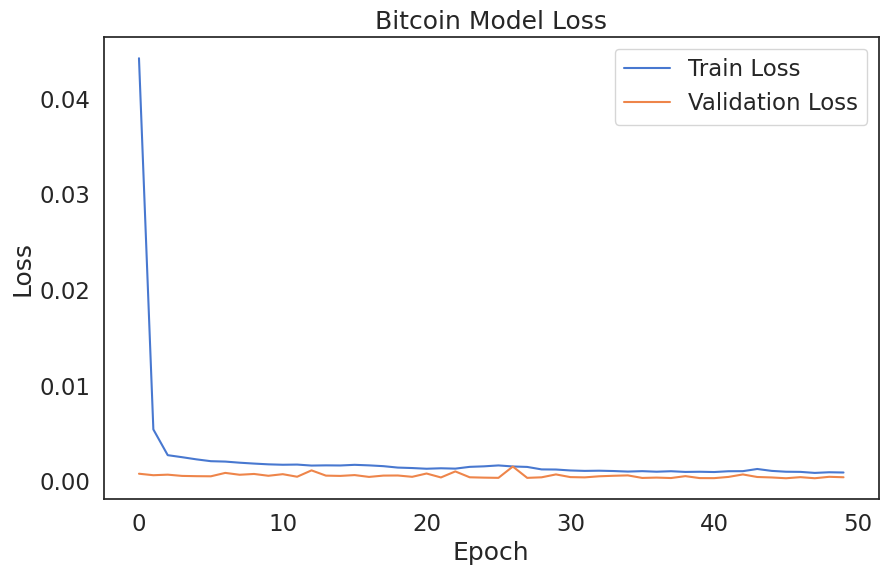

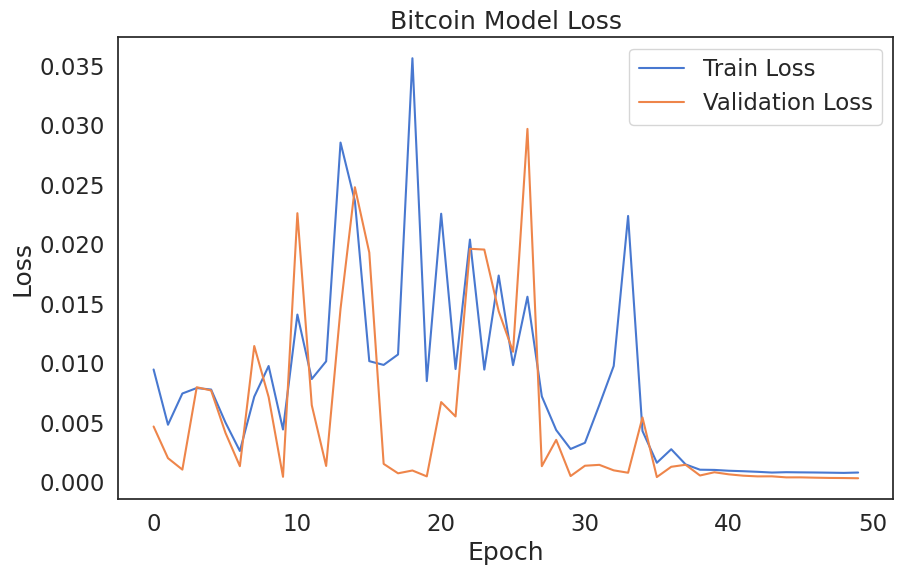

In [ ]:
# Plot the training and validation loss over epochs for Bitcoin
plt.figure(figsize=(10, 6))
plt.plot(history_bt.history['loss'], label='Train Loss')
plt.plot(history_bt.history['val_loss'], label='Validation Loss')
plt.title('Bitcoin Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

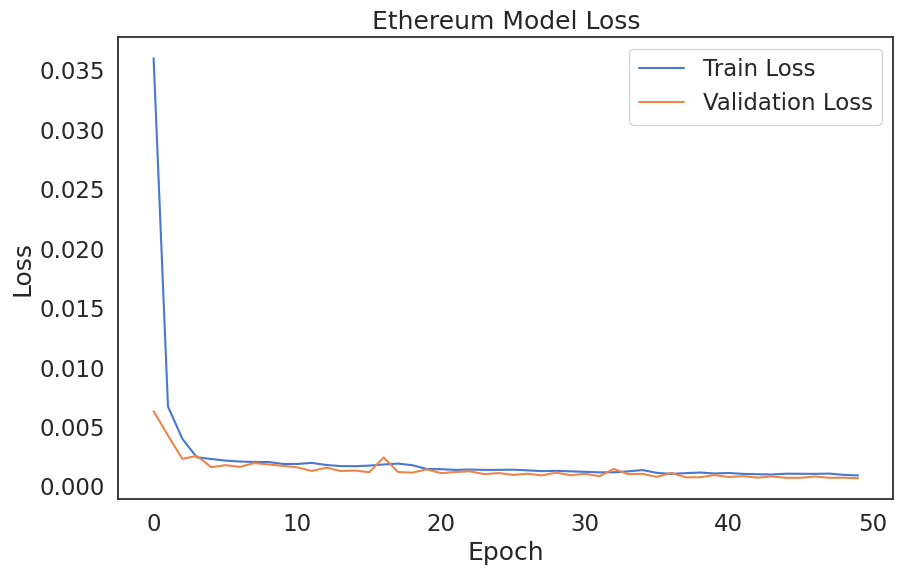

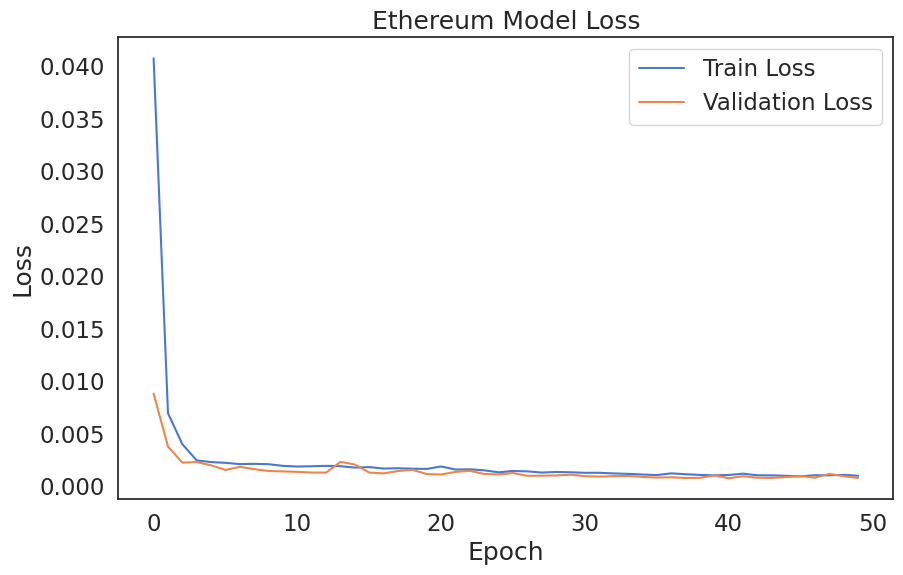

In [ ]:
# Plot the training and validation loss over epochs for Ethereum
plt.figure(figsize=(10, 6))
plt.plot(history_eth.history['loss'], label='Train Loss')
plt.plot(history_eth.history['val_loss'], label='Validation Loss')
plt.title('Ethereum Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model for Bitcoin
loss_bt = model_bt.evaluate(X_test_bt, y_test_bt)
print(f"Bitcoin Test Loss: {loss_bt:.4f}")

# Make predictions for Bitcoin
y_pred_bt = model_bt.predict(X_test_bt)

# Inverse transform the predictions to get the original price scale for Bitcoin
predicted_prices_lstm_bt = scaler_bt.inverse_transform(y_pred_bt)
y_test_inverse_bt = scaler_bt.inverse_transform(y_test_bt)

# Evaluate the model for Ethereum
loss_eth = model_eth.evaluate(X_test_eth, y_test_eth)
print(f"Ethereum Test Loss: {loss_eth:.4f}")

# Make predictions for Ethereum
y_pred_eth = model_eth.predict(X_test_eth)

# Inverse transform the predictions to get the original price scale for Ethereum
predicted_prices_lstm_eth = scaler_eth.inverse_transform(y_pred_eth)
y_test_inverse_eth = scaler_eth.inverse_transform(y_test_eth)

6/6 [==============================] - 0s 13ms/step - loss: 3.7646e-04
Bitcoin Test Loss: 0.0004
6/6 [==============================] - 0s 14ms/step - loss: 2.9774e-04
Ethereum Test Loss: 0.0003
6/6 [==============================] - 2s 25ms/step - loss: 3.6849e-04
Bitcoin Test Loss: 0.0004
6/6 [==============================] - 0s 10ms/step - loss: 3.3967e-04
Ethereum Test Loss: 0.0003
6/6 [==============================] - 1s 8ms/step


**Comparing Actual and Predicted Cryptocurrency Prices**

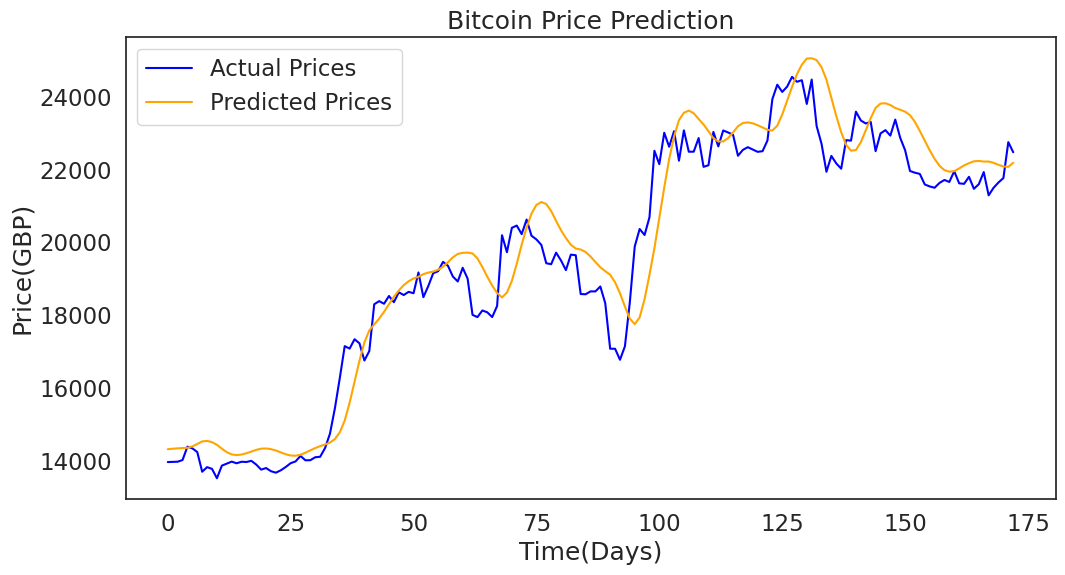

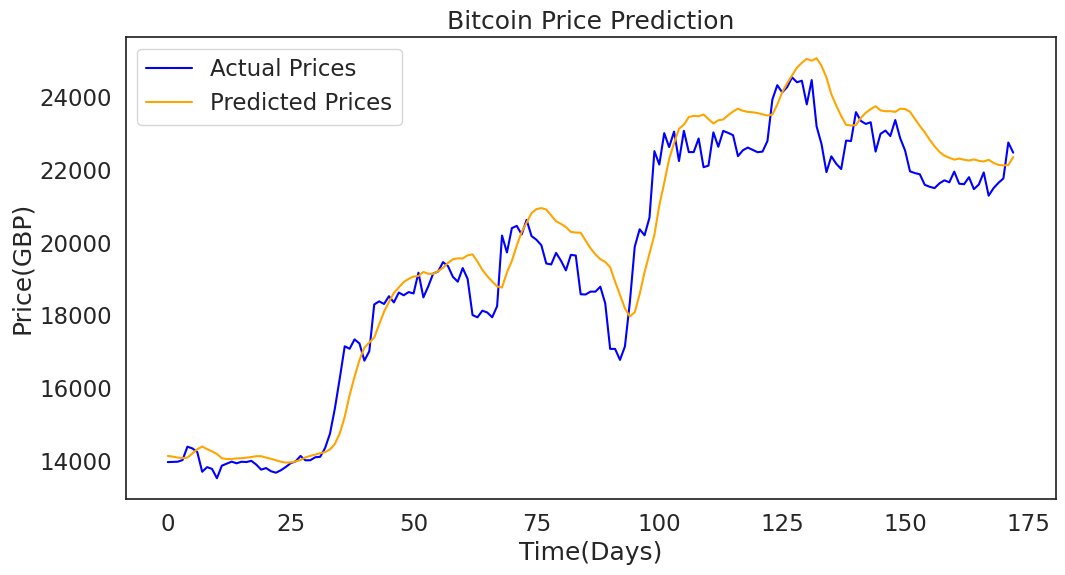

In [ ]:
# Plot actual and predicted prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_bt, label='Actual Prices', color='blue')
plt.plot(predicted_prices_lstm_bt, label='Predicted Prices', color='orange')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

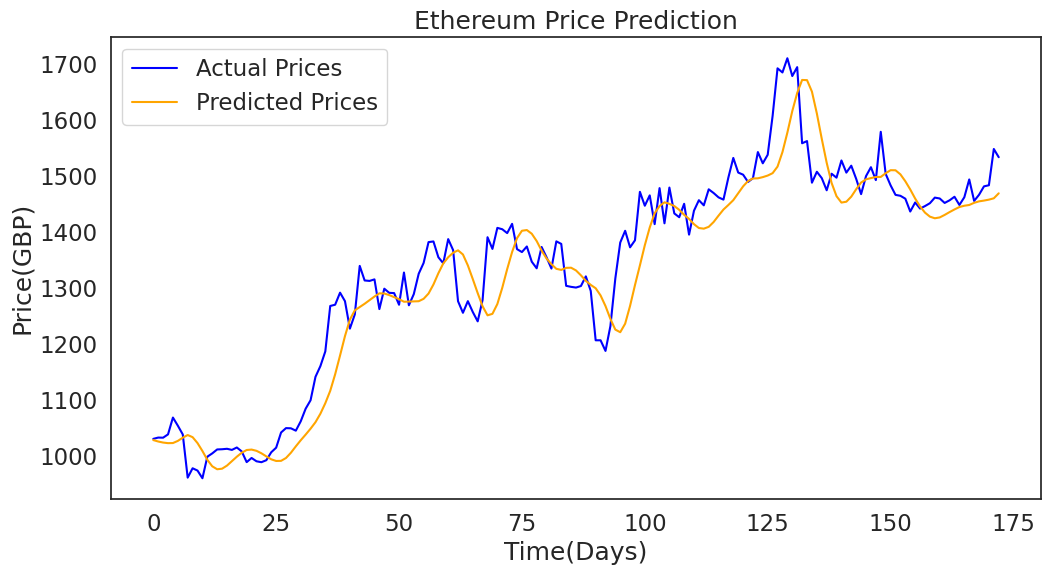

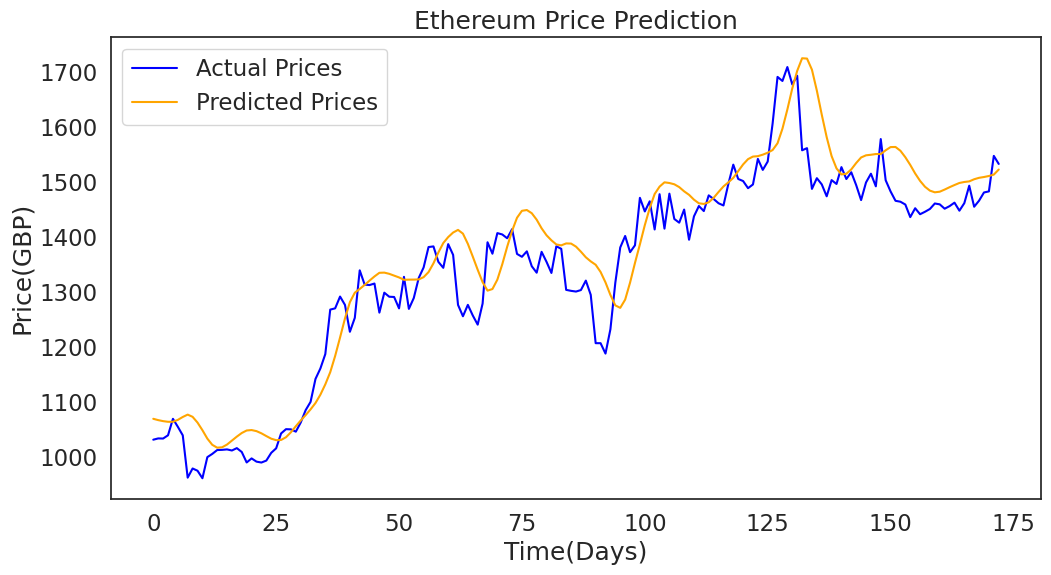

In [ ]:
# Plot actual and predicted prices for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_eth, label='Actual Prices', color='blue')
plt.plot(predicted_prices_lstm_eth, label='Predicted Prices', color='orange')
plt.title('Ethereum Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

**Evaluation Metrics for Cryptocurrency Price Predictions**

In [ ]:
# Calculate evaluation metrics for Bitcoin
mse_lstm_bt = mean_squared_error(y_test_bt, y_pred_bt)
rmse_lstm_bt = np.sqrt(mse_lstm_bt)
mae_lstm_bt = mean_absolute_error(y_test_bt, y_pred_bt)
r2_lstm_bt = r2_score(y_test_bt, y_pred_bt)

# Print evaluation metrics for Bitcoin
print("Bitcoin Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_lstm_bt:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm_bt:.6f}")
print(f"Mean Absolute Error (MAE): {mae_lstm_bt:.6f}")
print(f"R-squared: {r2_lstm_bt:.6f}")

Bitcoin Evaluation Metrics:
Mean Squared Error (MSE): 0.000376
Root Mean Squared Error (RMSE): 0.019402
Mean Absolute Error (MAE): 0.015399
R-squared: 0.924864
Bitcoin Evaluation Metrics:
Mean Squared Error (MSE): 0.000368
Root Mean Squared Error (RMSE): 0.019196
Mean Absolute Error (MAE): 0.015133
R-squared: 0.926453


In [ ]:
# Calculate evaluation metrics for Ethereum
mse_lstm_eth = mean_squared_error(y_test_eth, y_pred_eth)
rmse_lstm_eth = np.sqrt(mse_lstm_eth)
mae_lstm_eth = mean_absolute_error(y_test_eth, y_pred_eth)
r2_lstm_eth = r2_score(y_test_eth, y_pred_eth)

# Print evaluation metrics for Ethereum
print("Ethereum Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_lstm_eth:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm_eth:.6f}")
print(f"Mean Absolute Error (MAE): {mae_lstm_eth:.6f}")
print(f"R-squared: {r2_lstm_eth:.6f}")

Ethereum Evaluation Metrics:
Mean Squared Error (MSE): 0.000298
Root Mean Squared Error (RMSE): 0.017255
Mean Absolute Error (MAE): 0.013165
R-squared: 0.893217
Ethereum Evaluation Metrics:
Mean Squared Error (MSE): 0.000340
Root Mean Squared Error (RMSE): 0.018430
Mean Absolute Error (MAE): 0.014485
R-squared: 0.878179


# **Utilizing Random Forest Regression for Cryptocurrency Price Predictions**

In [ ]:
# Reshape y_train and y_test for Bitcoin
y_train_bt = y_train_bt.ravel()
y_test_bt = y_test_bt.ravel()


# Create a Random Forest Regressor model with tuned hyperparameters for Bitcoin
model_rf_bt = RandomForestRegressor(
    n_estimators=250,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model for Bitcoin
model_rf_bt.fit(X_train_bt.reshape(X_train_bt.shape[0], -1), y_train_bt)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=250, n_jobs=-1, random_state=42)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=250, n_jobs=-1, random_state=42)

In [ ]:
# Reshape y_train and y_test for Ethereum
y_train_eth = y_train_eth.ravel()
y_test_eth = y_test_eth.ravel()

# Create a Random Forest Regressor model with tuned hyperparameters for Ethereum
model_rf_eth = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model for Ethereum
model_rf_eth.fit(X_train_eth.reshape(X_train_eth.shape[0], -1), y_train_eth)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=200, n_jobs=-1, random_state=42)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions for Bitcoin
y_pred_bt = model_rf_bt.predict(X_test_bt.reshape(X_test_bt.shape[0], -1))

# Inverse transform the predictions to get the original price scale for Bitcoin
predicted_prices_rf_bt = scaler_bt.inverse_transform(y_pred_bt.reshape(-1, 1))
y_test_inverse_bt = scaler_bt.inverse_transform(y_test_bt.reshape(-1, 1))


# Make predictions for Ethereum
y_pred_eth = model_rf_eth.predict(X_test_eth.reshape(X_test_eth.shape[0], -1))

# Inverse transform the predictions to get the original price scale for Ethereum
predicted_prices_rf_eth = scaler_eth.inverse_transform(y_pred_eth.reshape(-1, 1))
y_test_inverse_eth = scaler_eth.inverse_transform(y_test_eth.reshape(-1, 1))

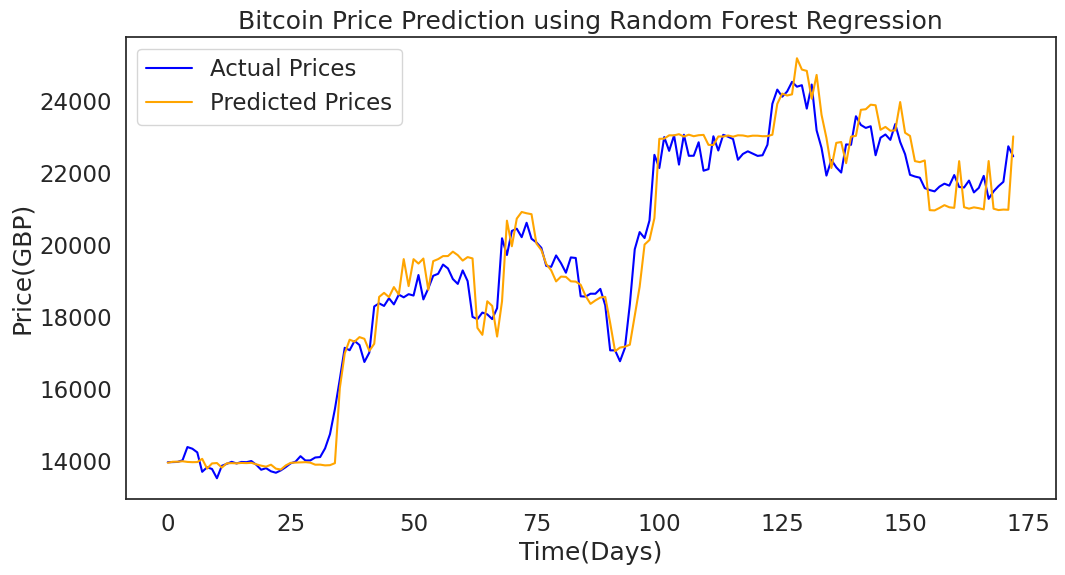

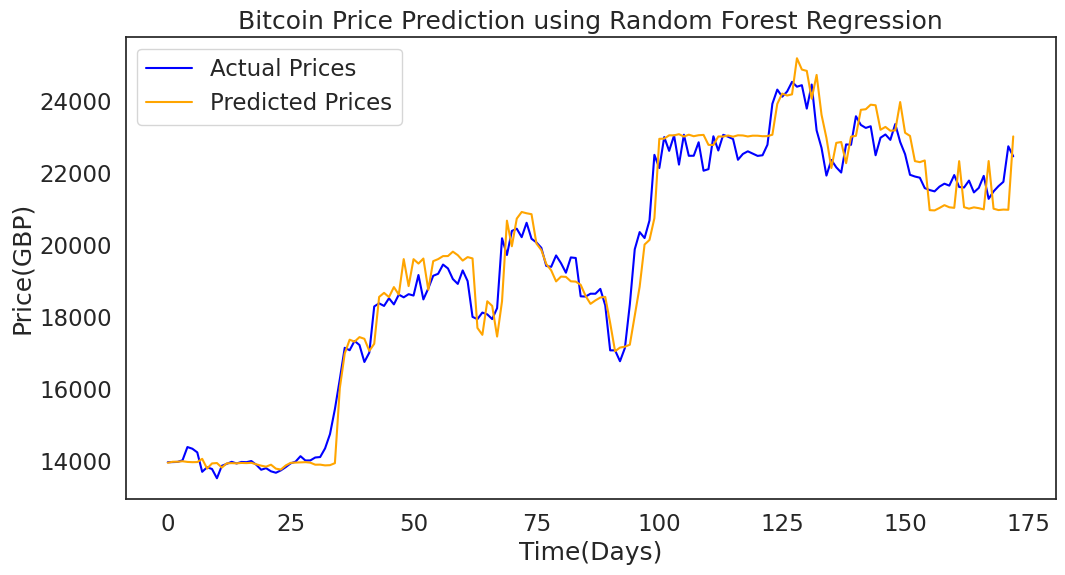

In [ ]:
# Plot actual and predicted prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_bt, label='Actual Prices', color='blue')
plt.plot(predicted_prices_rf_bt, label='Predicted Prices', color='orange')
plt.title('Bitcoin Price Prediction using Random Forest Regression')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

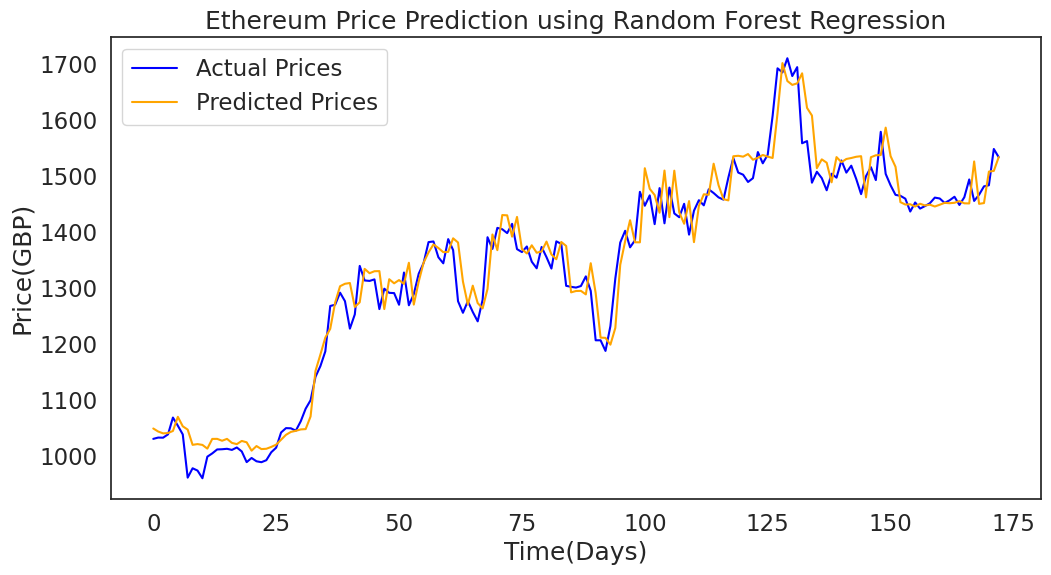

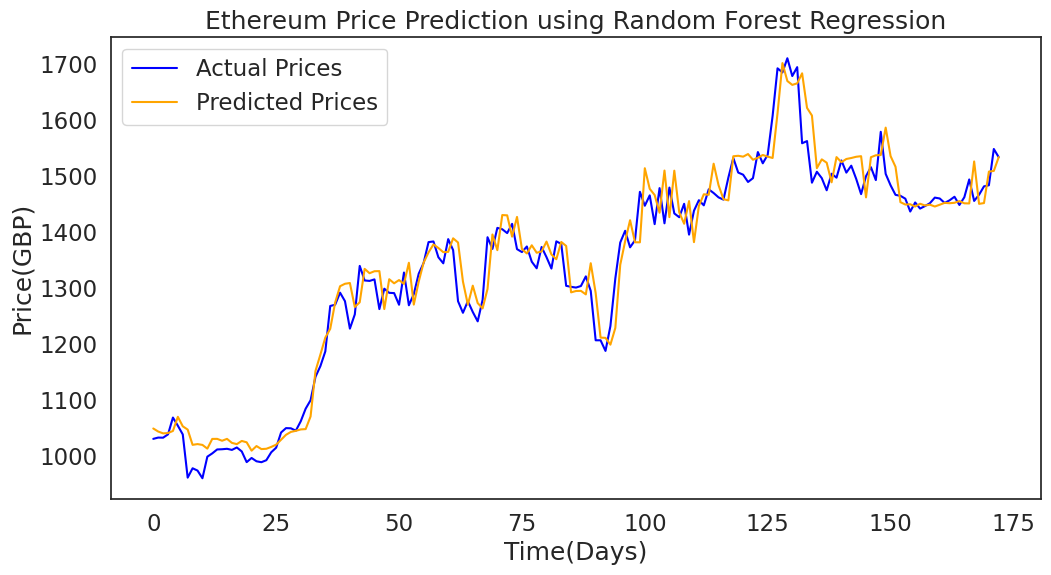

In [ ]:
# Plot actual and predicted prices for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_eth, label='Actual Prices', color='blue')
plt.plot(predicted_prices_rf_eth, label='Predicted Prices', color='orange')
plt.title('Ethereum Price Prediction using Random Forest Regression')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

In [ ]:
# Calculate evaluation metrics for Bitcoin predictions
mse_rf_bt = mean_squared_error(y_test_bt, y_pred_bt)
rmse_rf_bt = np.sqrt(mse_rf_bt)
mae_rf_bt = mean_absolute_error(y_test_bt, y_pred_bt)
r2_rf_bt = r2_score(y_test_bt, y_pred_bt)

# Print evaluation metrics for Bitcoin predictions
print("Bitcoin Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf_bt:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_bt:.6f}")
print(f"Mean Absolute Error (MAE): {mae_rf_bt:.6f}")
print(f"R-squared: {r2_rf_bt:.6f}")

Bitcoin Evaluation Metrics:
Mean Squared Error (MSE): 0.000174
Root Mean Squared Error (RMSE): 0.013174
Mean Absolute Error (MAE): 0.009879
R-squared: 0.965362
Bitcoin Evaluation Metrics:
Mean Squared Error (MSE): 0.000174
Root Mean Squared Error (RMSE): 0.013174
Mean Absolute Error (MAE): 0.009879
R-squared: 0.965362


In [ ]:
# Calculate evaluation metrics for Ethereum predictions
mse_rf_eth = mean_squared_error(y_test_eth, y_pred_eth)
rmse_rf_eth = np.sqrt(mse_rf_eth)
mae_rf_eth = mean_absolute_error(y_test_eth, y_pred_eth)
r2_rf_eth = r2_score(y_test_eth, y_pred_eth)

# Print evaluation metrics for Ethereum predictions
print("Ethereum Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf_eth:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_eth:.6f}")
print(f"Mean Absolute Error (MAE): {mae_rf_eth:.6f}")
print(f"R-squared: {r2_rf_eth:.6f}")

Ethereum Evaluation Metrics:
Mean Squared Error (MSE): 0.000128
Root Mean Squared Error (RMSE): 0.011330
Mean Absolute Error (MAE): 0.008667
R-squared: 0.953961
Ethereum Evaluation Metrics:
Mean Squared Error (MSE): 0.000128
Root Mean Squared Error (RMSE): 0.011330
Mean Absolute Error (MAE): 0.008667
R-squared: 0.953961


# **XGBoost**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:19:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


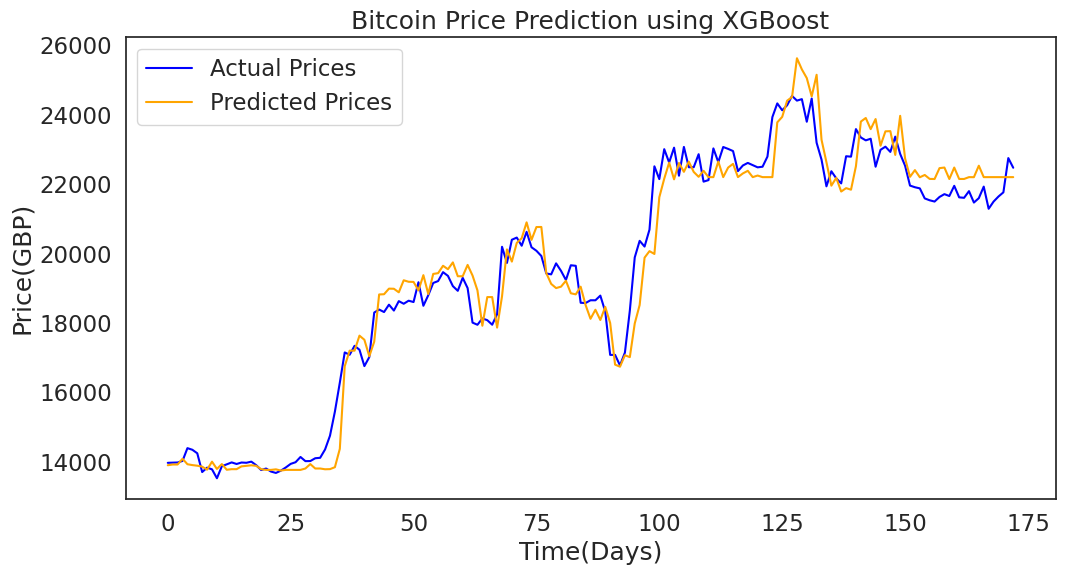

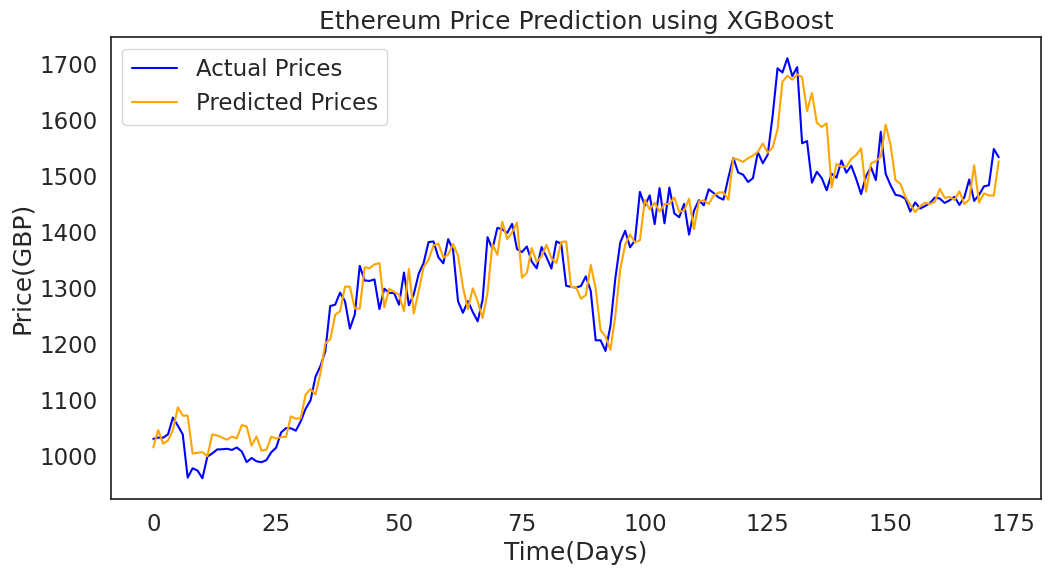




Bitcoin Evaluation Metrics:
Mean Squared Error (MSE): 0.000196
Root Mean Squared Error (RMSE): 0.014007
Mean Absolute Error (MAE): 0.010471
R-squared: 0.960840
Ethereum Evaluation Metrics:
Mean Squared Error (MSE): 0.000144
Root Mean Squared Error (RMSE): 0.012010
Mean Absolute Error (MAE): 0.009033
R-squared: 0.948272


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


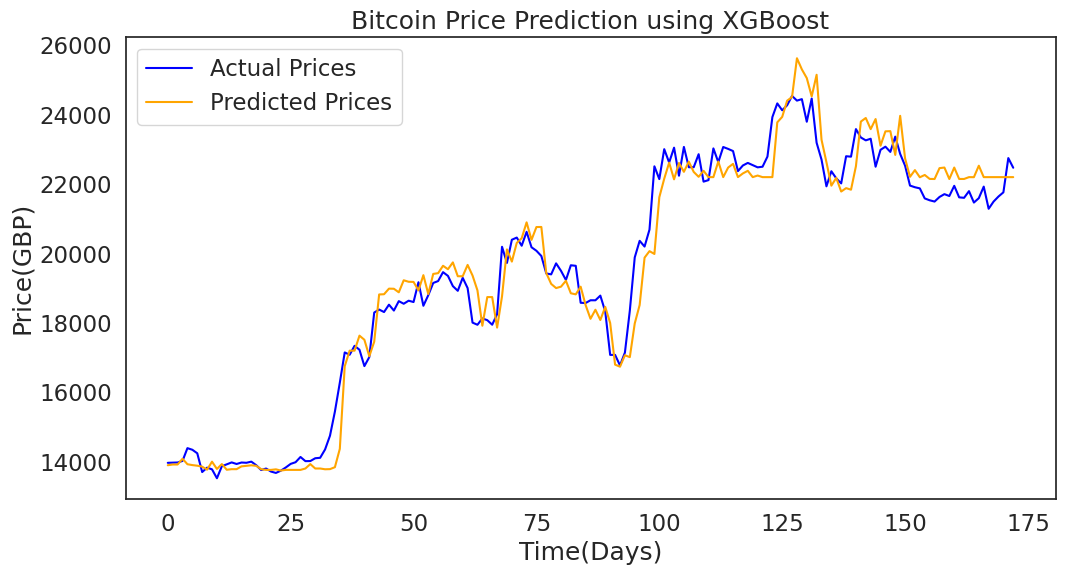

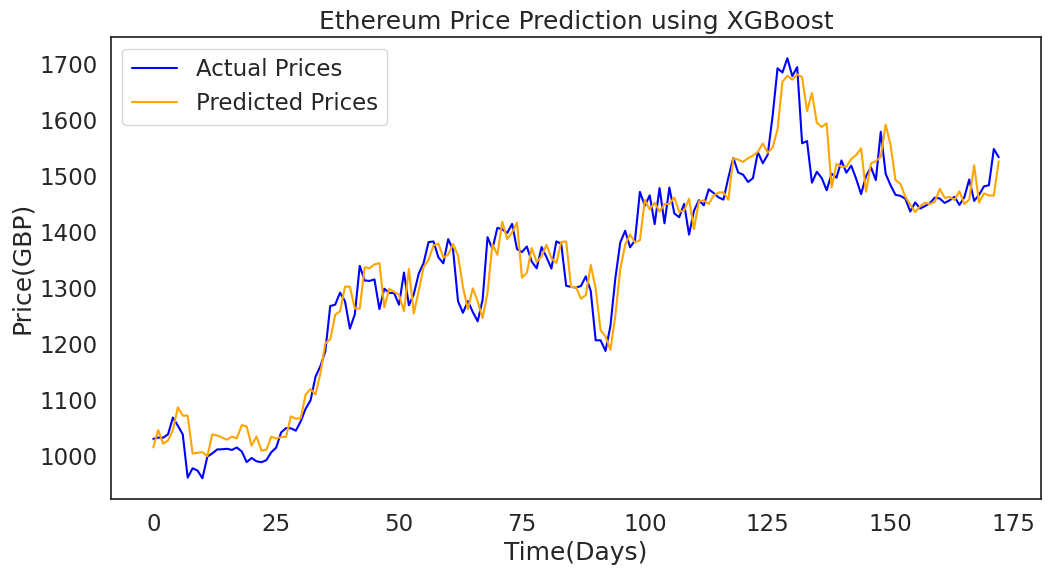




Bitcoin Evaluation Metrics:
Mean Squared Error (MSE): 0.000196
Root Mean Squared Error (RMSE): 0.014007
Mean Absolute Error (MAE): 0.010471
R-squared: 0.960840
Ethereum Evaluation Metrics:
Mean Squared Error (MSE): 0.000144
Root Mean Squared Error (RMSE): 0.012010
Mean Absolute Error (MAE): 0.009033
R-squared: 0.948272


In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor

# Reshape y_train and y_test for Bitcoin
y_train_bt = y_train_bt.ravel()
y_test_bt = y_test_bt.ravel()

# Create an XGBoost Regressor model with tuned hyperparameters for Bitcoin
model_xgb_bt = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Train the model for Bitcoin
model_xgb_bt.fit(X_train_bt.reshape(X_train_bt.shape[0], -1), y_train_bt)

# Reshape y_train and y_test for Ethereum
y_train_eth = y_train_eth.ravel()
y_test_eth = y_test_eth.ravel()

# Create an XGBoost Regressor model with tuned hyperparameters for Ethereum
model_xgb_eth = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Train the model for Ethereum
model_xgb_eth.fit(X_train_eth.reshape(X_train_eth.shape[0], -1), y_train_eth)

# Make predictions for Bitcoin
y_pred_bt = model_xgb_bt.predict(X_test_bt.reshape(X_test_bt.shape[0], -1))

# Inverse transform the predictions to get the original price scale for Bitcoin
predicted_prices_xgb_bt = scaler_bt.inverse_transform(y_pred_bt.reshape(-1, 1))
y_test_inverse_bt = scaler_bt.inverse_transform(y_test_bt.reshape(-1, 1))

# Make predictions for Ethereum
y_pred_eth = model_xgb_eth.predict(X_test_eth.reshape(X_test_eth.shape[0], -1))

# Inverse transform the predictions to get the original price scale for Ethereum
predicted_prices_xgb_eth = scaler_eth.inverse_transform(y_pred_eth.reshape(-1, 1))
y_test_inverse_eth = scaler_eth.inverse_transform(y_test_eth.reshape(-1, 1))

# Plot actual and predicted prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_bt, label='Actual Prices', color='blue')
plt.plot(predicted_prices_xgb_bt, label='Predicted Prices', color='orange')
plt.title('Bitcoin Price Prediction using XGBoost')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

# Plot actual and predicted prices for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_eth, label='Actual Prices', color='blue')
plt.plot(predicted_prices_xgb_eth, label='Predicted Prices', color='orange')
plt.title('Ethereum Price Prediction using XGBoost')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

print('\n\n')
# Calculate evaluation metrics for Bitcoin predictions
mse_xgb_bt = mean_squared_error(y_test_bt, y_pred_bt)
rmse_xgb_bt = np.sqrt(mse_xgb_bt)
mae_xgb_bt = mean_absolute_error(y_test_bt, y_pred_bt)
r2_xgb_bt = r2_score(y_test_bt, y_pred_bt)

# Print evaluation metrics for Bitcoin predictions
print("Bitcoin Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb_bt:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_bt:.6f}")
print(f"Mean Absolute Error (MAE): {mae_xgb_bt:.6f}")
print(f"R-squared: {r2_xgb_bt:.6f}")

# Calculate evaluation metrics for Ethereum predictions
mse_xgb_eth = mean_squared_error(y_test_eth, y_pred_eth)
rmse_xgb_eth = np.sqrt(mse_xgb_eth)
mae_xgb_eth = mean_absolute_error(y_test_eth, y_pred_eth)
r2_xgb_eth = r2_score(y_test_eth, y_pred_eth)

# Print evaluation metrics for Ethereum predictions
print("Ethereum Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb_eth:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_eth:.6f}")
print(f"Mean Absolute Error (MAE): {mae_xgb_eth:.6f}")
print(f"R-squared: {r2_xgb_eth:.6f}")



# **Using Bidirectional LSTM for Cryptocurrency Price Prediction**

In [ ]:
# Create a Sequential model for Bitcoin
model_bt = keras.Sequential()
model_bt.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, X_train_bt.shape[-1])))
model_bt.add(Dropout(rate=DROPOUT))
model_bt.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model_bt.add(Dropout(rate=DROPOUT))
model_bt.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model_bt.add(Dense(units=1))
model_bt.add(Activation('linear'))

# Compile the model for Bitcoin
model_bt.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Create a Sequential model for Ethereum
model_eth = keras.Sequential()
model_eth.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, X_train_eth.shape[-1])))
model_eth.add(Dropout(rate=DROPOUT))
model_eth.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model_eth.add(Dropout(rate=DROPOUT))
model_eth.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model_eth.add(Dense(units=1))
model_eth.add(Activation('linear'))

# Compile the model for Ethereum
model_eth.compile(loss='mean_squared_error', optimizer='adam')

**Train the Bidirectional LSTM Models**

In [ ]:
# Train the model for Bitcoin
history_bt = model_bt.fit(
    X_train_bt,                  # Training input data
    y_train_bt,                  # Target output data
    epochs=50,                   # Number of training epochs
    batch_size=128,               # Batch size for each iteration
    shuffle=False,               # Don't shuffle the data
    validation_split=0.1         # Fraction of data used for validation
)

Epoch 1/50
11/11 [==============================] - 13s 251ms/step - loss: 0.0095 - val_loss: 0.0047
Epoch 2/50
11/11 [==============================] - 1s 66ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 3/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0074 - val_loss: 0.0010
Epoch 4/50
11/11 [==============================] - 1s 61ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 5/50
11/11 [==============================] - 1s 61ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 6/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 7/50
11/11 [==============================] - 1s 63ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 8/50
11/11 [==============================] - 1s 65ms/step - loss: 0.0072 - val_loss: 0.0114
Epoch 9/50
11/11 [==============================] - 1s 66ms/step - loss: 0.0098 - val_loss: 0.0072
Epoch 10/50
11/11 [==============================] - 1s 68ms/step - loss: 0.0044 - val_loss: 4.4565e-04
Epo

In [ ]:
# Train the model for Ethereum
history_eth = model_eth.fit(
    X_train_eth,                 # Training input data
    y_train_eth,                 # Target output data
    epochs=50,                   # Number of training epochs
    batch_size=128,               # Batch size for each iteration
    shuffle=False,               # Don't shuffle the data
    validation_split=0.1         # Fraction of data used for validation
)

Epoch 1/50
11/11 [==============================] - 13s 346ms/step - loss: 0.0140 - val_loss: 0.0058
Epoch 2/50
11/11 [==============================] - 1s 67ms/step - loss: 0.0828 - val_loss: 0.0020
Epoch 3/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0344 - val_loss: 0.0352
Epoch 4/50
11/11 [==============================] - 1s 64ms/step - loss: 0.0173 - val_loss: 0.0155
Epoch 5/50
11/11 [==============================] - 1s 64ms/step - loss: 0.0184 - val_loss: 0.0041
Epoch 6/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0169 - val_loss: 0.0021
Epoch 7/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0585 - val_loss: 0.0211
Epoch 8/50
11/11 [==============================] - 1s 64ms/step - loss: 0.0089 - val_loss: 0.0166
Epoch 9/50
11/11 [==============================] - 1s 66ms/step - loss: 0.0106 - val_loss: 0.0026
Epoch 10/50
11/11 [==============================] - 1s 64ms/step - loss: 0.0390 - val_loss: 0.0049
Epoch 1

**Evaluate the Bidirectional LSTM Models**

In [ ]:
# Evaluate the model for Bitcoin
loss_bt = model_bt.evaluate(X_test_bt, y_test_bt)
print(f"Test Loss for Bitcoin: {loss_bt:.6f}")

# Evaluate the model for Ethereum
loss_eth = model_eth.evaluate(X_test_eth, y_test_eth)
print(f"Test Loss for Ethereum: {loss_eth:.6f}")


6/6 [==============================] - 0s 13ms/step - loss: 3.6849e-04
Test Loss for Bitcoin: 0.000368
6/6 [==============================] - 0s 13ms/step - loss: 0.0012
Test Loss for Ethereum: 0.001208
6/6 [==============================] - 0s 12ms/step - loss: 4.6190e-04
Test Loss for Bitcoin: 0.000462
6/6 [==============================] - 0s 12ms/step - loss: 5.7033e-04
Test Loss for Ethereum: 0.000570


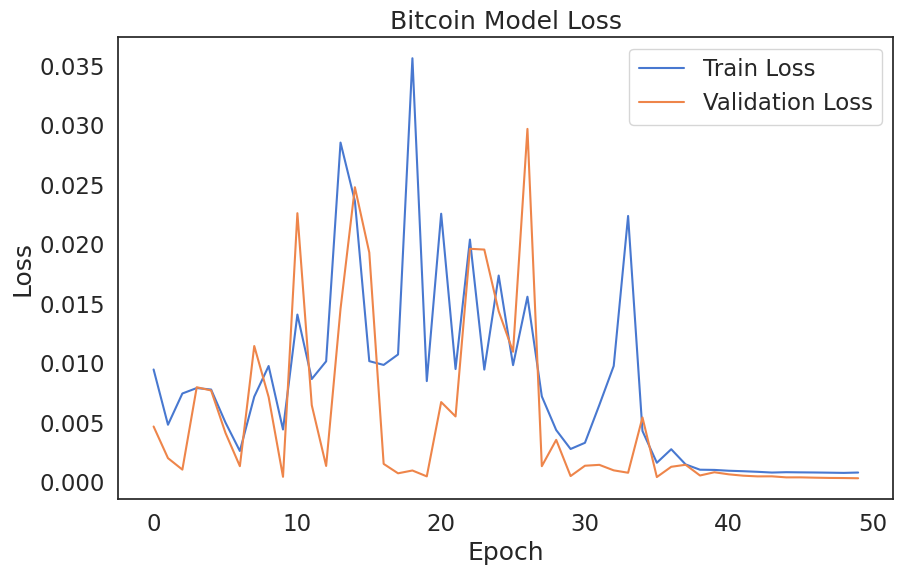

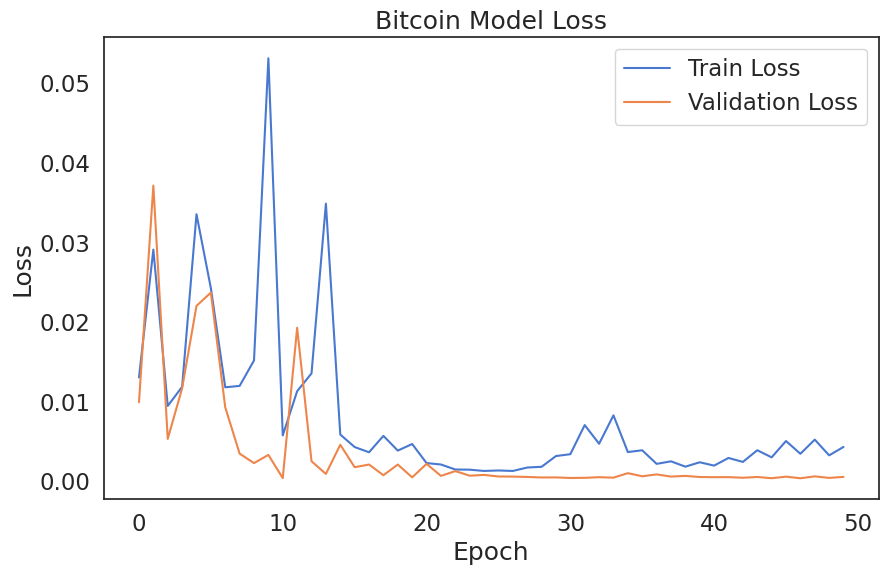

In [ ]:
# Plot Training and Validation Loss for Bitcoin

plt.figure(figsize=(10, 6))
plt.plot(history_bt.history['loss'], label='Train Loss')
plt.plot(history_bt.history['val_loss'], label='Validation Loss')
plt.title('Bitcoin Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

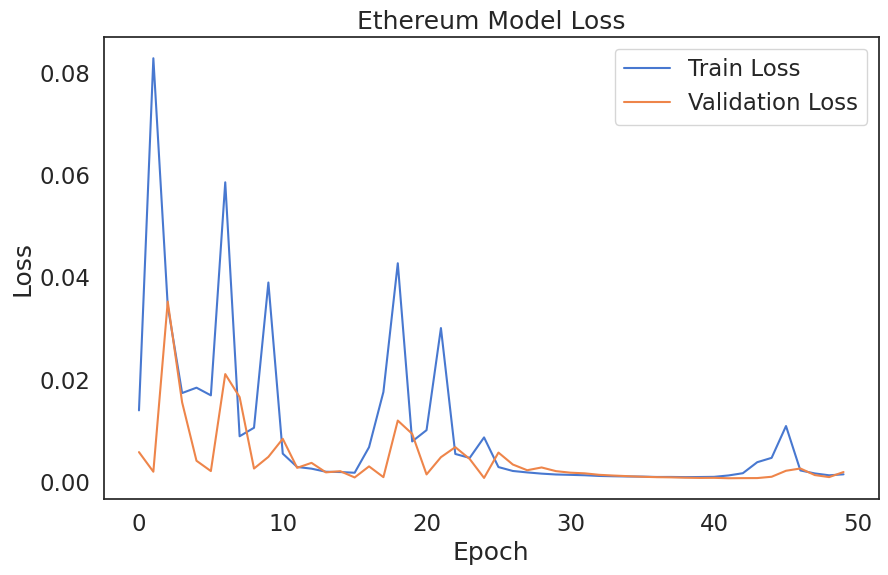

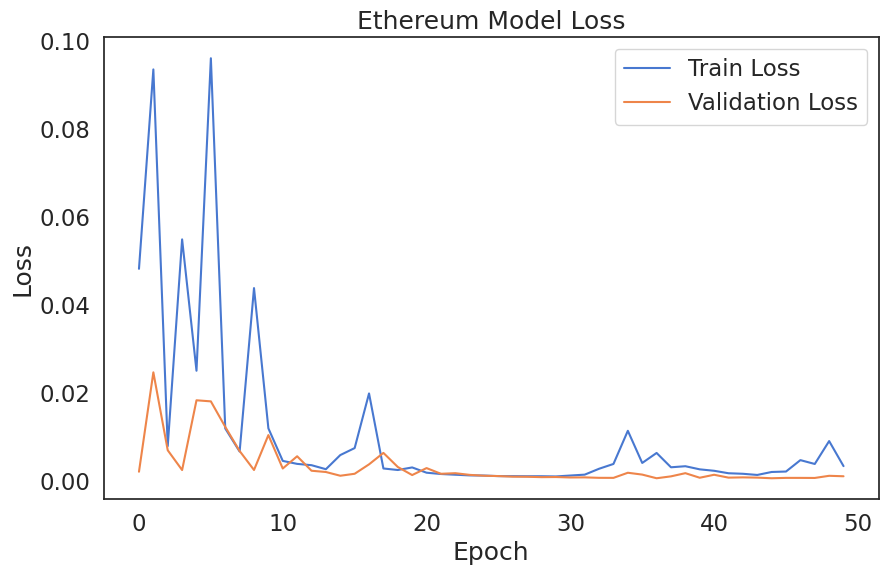

In [ ]:
# Plot Training and Validation Loss for Ethereum

plt.figure(figsize=(10, 6))
plt.plot(history_eth.history['loss'], label='Train Loss')
plt.plot(history_eth.history['val_loss'], label='Validation Loss')
plt.title('Ethereum Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Make Predictions using the Bidirectional LSTM Model**

6/6 [==============================] - 3s 22ms/step


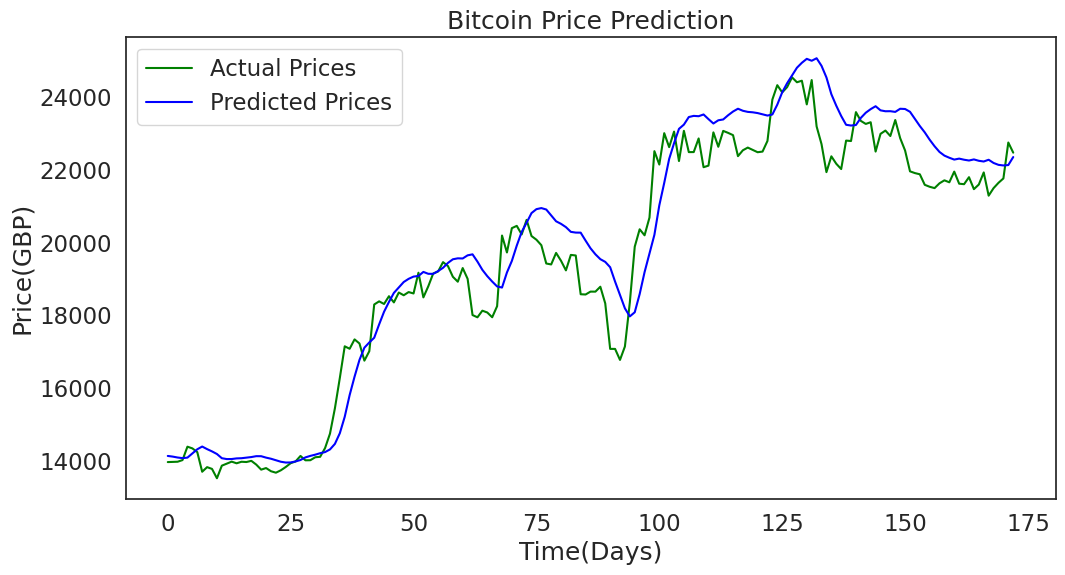

6/6 [==============================] - 2s 20ms/step


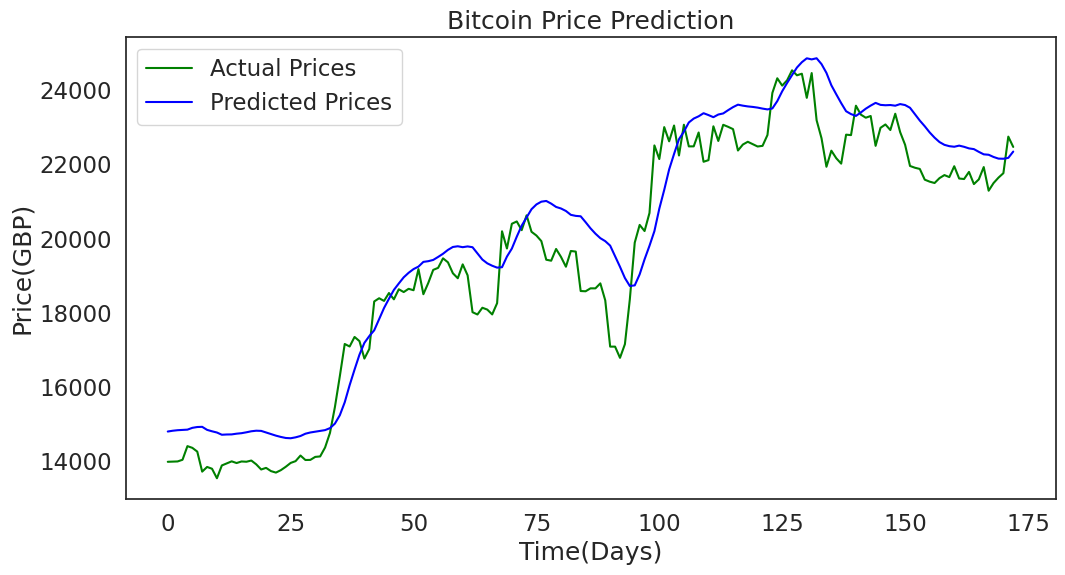

In [ ]:
# Predict prices for Bitcoin
y_pred_bt = model_bt.predict(X_test_bt)

# Inverse transform the predictions to get original price scale
y_test_inverse_bt = scaler_bt.inverse_transform(y_test_bt.reshape(-1, 1))
y_pred_inverse_bi_lstm_bt = scaler_bt.inverse_transform(y_pred_bt.reshape(-1, 1))

# Plot actual and predicted prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_bt, label='Actual Prices', color='green')
plt.plot(y_pred_inverse_bi_lstm_bt, label='Predicted Prices', color='blue')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

6/6 [==============================] - 2s 20ms/step


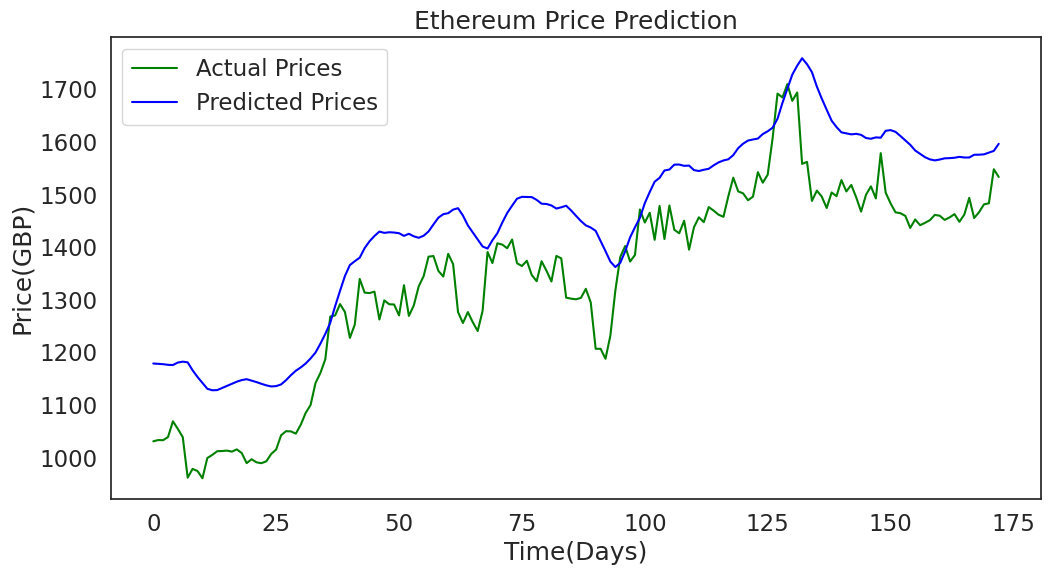

6/6 [==============================] - 2s 21ms/step


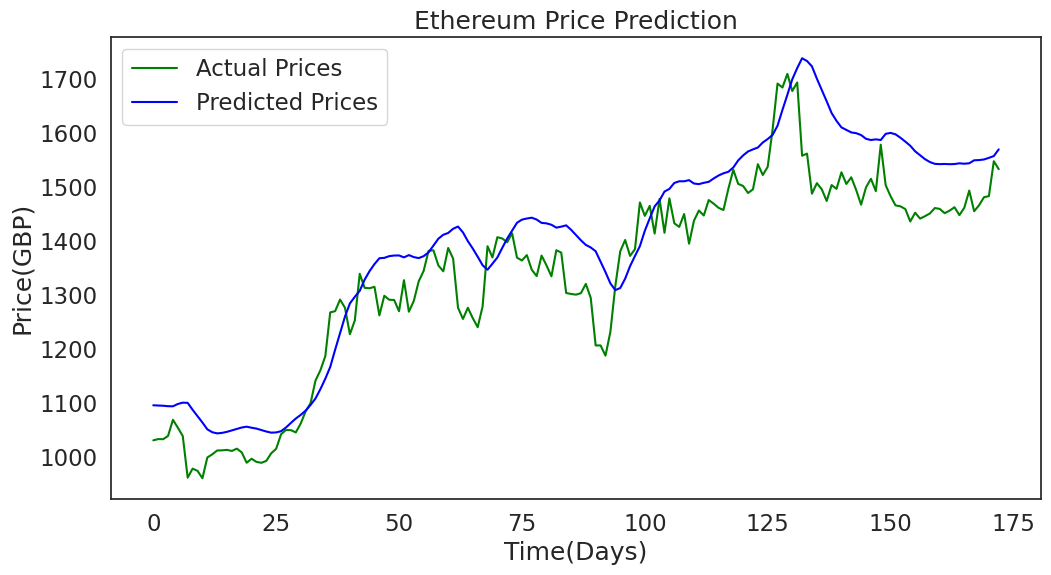

In [ ]:
# Predict prices for Ethereum
y_pred_eth = model_eth.predict(X_test_eth)

# Inverse transform the predictions to get original price scale
y_test_inverse_eth = scaler_eth.inverse_transform(y_test_eth.reshape(-1, 1))
y_pred_inverse_bi_lstm_eth = scaler_eth.inverse_transform(y_pred_eth.reshape(-1, 1))

# Plot actual and predicted prices for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_eth, label='Actual Prices', color='green')
plt.plot(y_pred_inverse_bi_lstm_eth, label='Predicted Prices', color='blue')
plt.title('Ethereum Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

**Evaluate the Bidirectional LSTM Models**

In [ ]:
# Evaluate Bitcoin Model
mse_bi_lstm_bt = mean_squared_error(y_test_bt, y_pred_bt)
rmse_bi_lstm_bt = np.sqrt(mse_bi_lstm_bt)
mae_bi_lstm_bt = mean_absolute_error(y_test_bt, y_pred_bt)
r2_bi_lstm_bt = r2_score(y_test_bt, y_pred_bt)

print("Bitcoin Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_bi_lstm_bt:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_bi_lstm_bt:.6f}")
print(f"Mean Absolute Error (MAE): {mae_bi_lstm_bt:.6f}")
print(f"R-squared: {r2_bi_lstm_bt:.6f}")

Bitcoin Model Evaluation:
Mean Squared Error (MSE): 0.000368
Root Mean Squared Error (RMSE): 0.019196
Mean Absolute Error (MAE): 0.015133
R-squared: 0.926453
Bitcoin Model Evaluation:
Mean Squared Error (MSE): 0.000462
Root Mean Squared Error (RMSE): 0.021492
Mean Absolute Error (MAE): 0.018323
R-squared: 0.907811


In [ ]:
# Evaluate Ethereum Model
mse_bi_lstm_eth = mean_squared_error(y_test_eth, y_pred_eth)
rmse_bi_lstm_eth = np.sqrt(mse_bi_lstm_eth)
mae_bi_lstm_eth = mean_absolute_error(y_test_eth, y_pred_eth)
r2_bi_lstm_eth = r2_score(y_test_eth, y_pred_eth)

print("Ethereum Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_bi_lstm_eth:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_bi_lstm_eth:.6f}")
print(f"Mean Absolute Error (MAE): {mae_bi_lstm_eth:.6f}")
print(f"R-squared: {r2_bi_lstm_eth:.6f}")

Ethereum Model Evaluation:
Mean Squared Error (MSE): 0.001208
Root Mean Squared Error (RMSE): 0.034758
Mean Absolute Error (MAE): 0.031821
R-squared: 0.566709
Ethereum Model Evaluation:
Mean Squared Error (MSE): 0.000570
Root Mean Squared Error (RMSE): 0.023882
Mean Absolute Error (MAE): 0.020124
R-squared: 0.795456


# Comparing Model Performances and Selecting the Best Model

In [ ]:
# selecting the best model

import pandas as pd
models = [
    ("LSTM", mse_lstm_bt, rmse_lstm_bt, mae_lstm_bt, r2_lstm_bt),
    ("Random Forest", mse_rf_bt, rmse_rf_bt, mae_rf_bt, r2_rf_bt),
    ("XGBoost", mse_xgb_bt, rmse_xgb_bt, mae_xgb_bt, r2_xgb_bt),
    ("Bidirectional LSTM", mse_bi_lstm_bt, rmse_bi_lstm_bt, mae_bi_lstm_bt, r2_bi_lstm_bt),
]

# Create a DataFrame to display model performance metrics
metrics_df = pd.DataFrame(models, columns=["Model", "MSE", "RMSE", "MAE", "R2"])

# Print the DataFrame
print(metrics_df.to_string())

# Select the best model based on the R2 score
best_model = metrics_df[metrics_df['R2'] == metrics_df['R2'].max()]['Model'].values[0]

print(f"The best model for Bitcoin price prediction is: {best_model}")

# Repeat the same process for Ethereum price prediction

models_eth = [
    ("LSTM", mse_lstm_eth, rmse_lstm_eth, mae_lstm_eth, r2_lstm_eth),
    ("Random Forest", mse_rf_eth, rmse_rf_eth, mae_rf_eth, r2_rf_eth),
    ("XGBoost", mse_xgb_eth, rmse_xgb_eth, mae_xgb_eth, r2_xgb_eth),
    ("Bidirectional LSTM", mse_bi_lstm_eth, rmse_bi_lstm_eth, mae_bi_lstm_eth, r2_bi_lstm_eth),
]

metrics_df_eth = pd.DataFrame(models_eth, columns=["Model", "MSE", "RMSE", "MAE", "R2"])

print(metrics_df_eth.to_string())

best_model_eth = metrics_df_eth[metrics_df_eth['R2'] == metrics_df_eth['R2'].max()]['Model'].values[0]

print(f"The best model for Ethereum price prediction is: {best_model_eth}")


                Model       MSE      RMSE       MAE        R2
0                LSTM  0.000376  0.019402  0.015399  0.924864
1       Random Forest  0.000174  0.013174  0.009879  0.965362
2             XGBoost  0.000196  0.014007  0.010471  0.960840
3  Bidirectional LSTM  0.000368  0.019196  0.015133  0.926453
The best model for Bitcoin price prediction is: Random Forest
                Model       MSE      RMSE       MAE        R2
0                LSTM  0.000298  0.017255  0.013165  0.893217
1       Random Forest  0.000128  0.011330  0.008667  0.953961
2             XGBoost  0.000144  0.012010  0.009033  0.948272
3  Bidirectional LSTM  0.001208  0.034758  0.031821  0.566709
The best model for Ethereum price prediction is: Random Forest
                Model       MSE      RMSE       MAE        R2
0                LSTM  0.000368  0.019196  0.015133  0.926453
1       Random Forest  0.000174  0.013174  0.009879  0.965362
2             XGBoost  0.000196  0.014007  0.010471  0.960840
3  Bidi

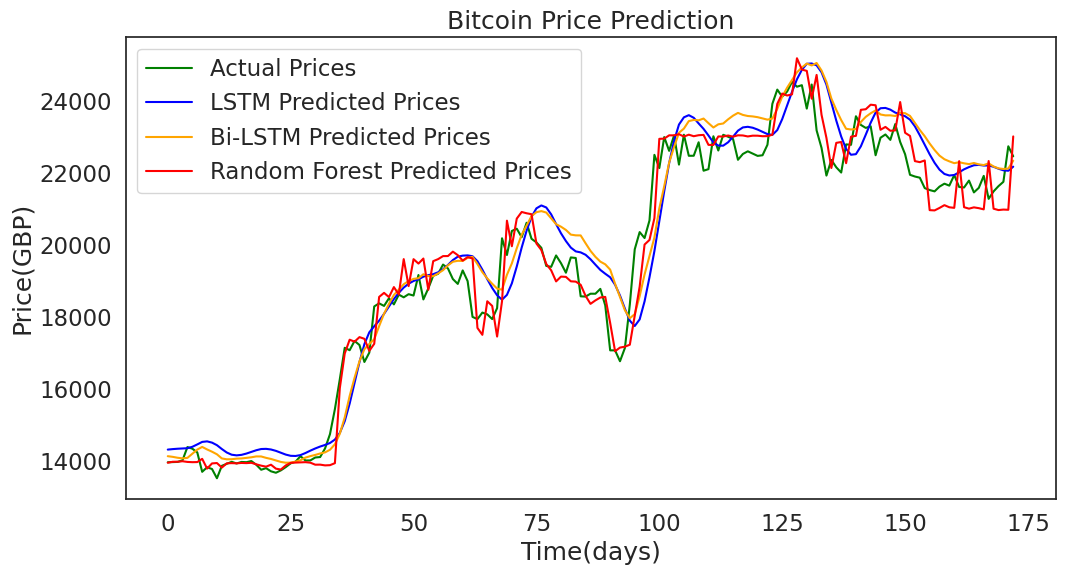

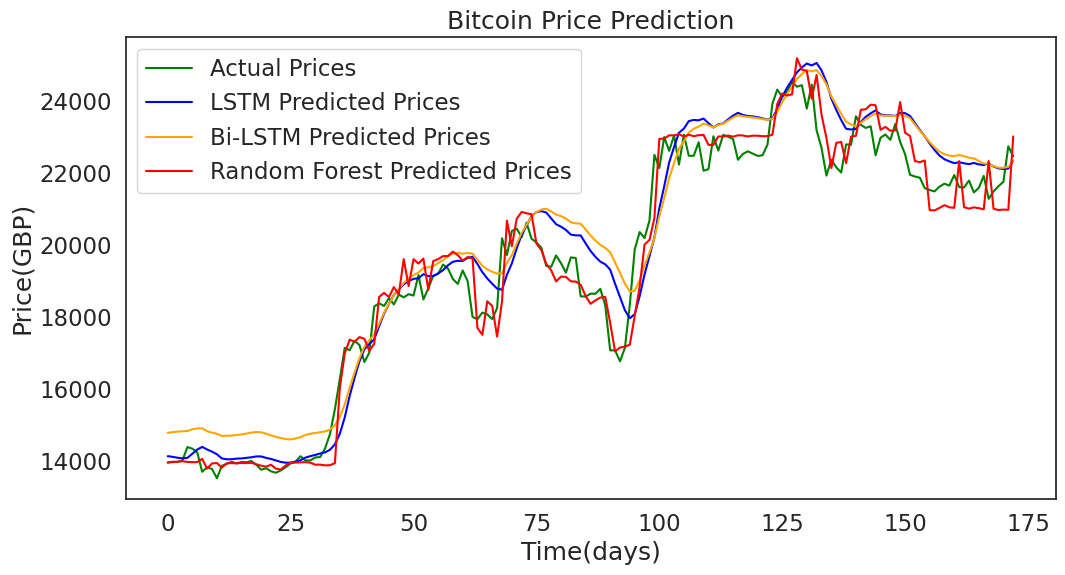

In [ ]:
#plot of predicted and actual price together
# Plot actual and predicted prices for Bitcoin

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_bt, label='Actual Prices', color='green')
plt.plot(predicted_prices_lstm_bt, label='LSTM Predicted Prices', color='blue')
plt.plot(y_pred_inverse_bi_lstm_bt, label='Bi-LSTM Predicted Prices', color='orange')
plt.plot(predicted_prices_rf_bt, label='Random Forest Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time(days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()

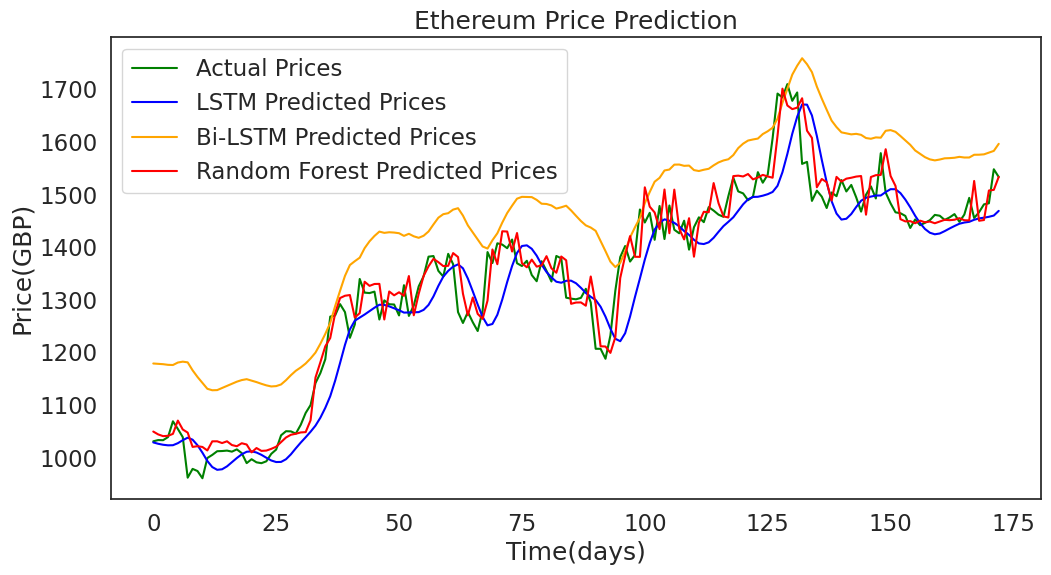

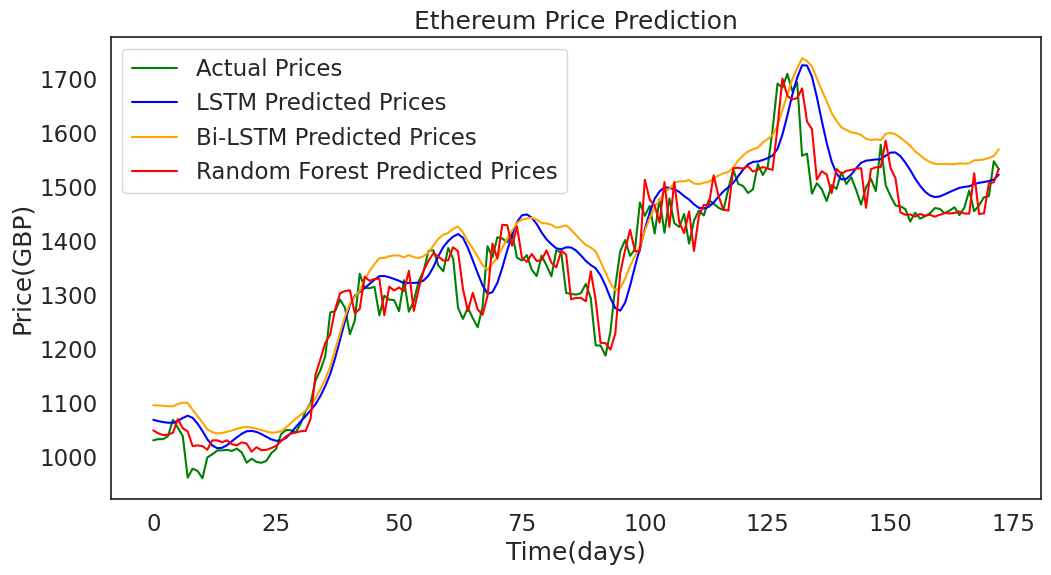

In [ ]:
# Plot actual and predicted prices for Ethereum
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse_eth, label='Actual Prices', color='green')
plt.plot(predicted_prices_lstm_eth, label='LSTM Predicted Prices', color='blue')
plt.plot(y_pred_inverse_bi_lstm_eth, label='Bi-LSTM Predicted Prices', color='orange')
plt.plot(predicted_prices_rf_eth, label='Random Forest Predicted Prices', color='red')
plt.title('Ethereum Price Prediction')
plt.xlabel('Time(days)')
plt.ylabel('Price(GBP)')
plt.legend()
plt.show()